## Import Packages

In [13]:
import pandas as pd
from sklearn.model_selection import train_test_split, StratifiedKFold
from tensorflow import keras
from tensorflow.keras import layers
from sklearn.ensemble import IsolationForest
import matplotlib.pyplot as plt
from sklearn.metrics import ConfusionMatrixDisplay
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier #随机森林模型
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.metrics import precision_recall_curve, roc_curve, auc
from sklearn.svm import SVC
from sklearn.linear_model import RidgeClassifier, LogisticRegression

## Read File

In [22]:
data = pd.read_csv("CW_project4.txt", sep=" ", header=None)
print(data)
data = data.drop(columns=6, axis=1)
data = data.rename(columns={7:6})


            0      1      2       3      4      5   6  7
0        7.20  12.30  18.87   42.02   6.14  25.52 NaN  0
1       11.36  10.46  21.99   22.59  22.09  64.97 NaN  1
2        8.12   8.40   6.70   12.67  13.92  14.20 NaN  0
3       28.96  11.06  17.60   40.36  23.71  39.91 NaN  1
4       36.72  35.99  33.29   32.10  12.10  21.12 NaN  1
...       ...    ...    ...     ...    ...    ...  .. ..
999995  32.91  13.67  35.62  119.69  13.81  52.39 NaN  1
999996  15.26  21.69  20.63   45.90  25.07  45.23 NaN  1
999997  38.96   8.38  34.08   12.14  10.56  14.09 NaN  0
999998  42.02  80.13  19.48   23.22  14.88  29.38 NaN  1
999999  37.79  22.94  24.42   24.53  23.76  40.80 NaN  1

[1000000 rows x 8 columns]


## Data Exploration 

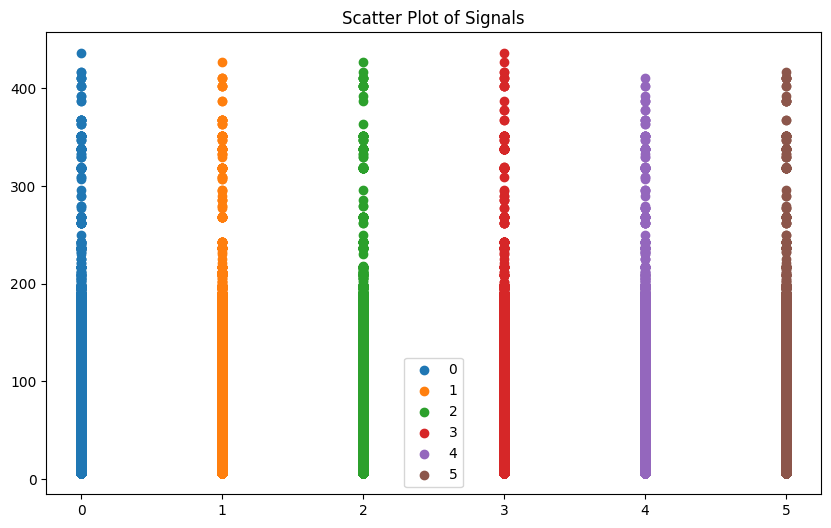

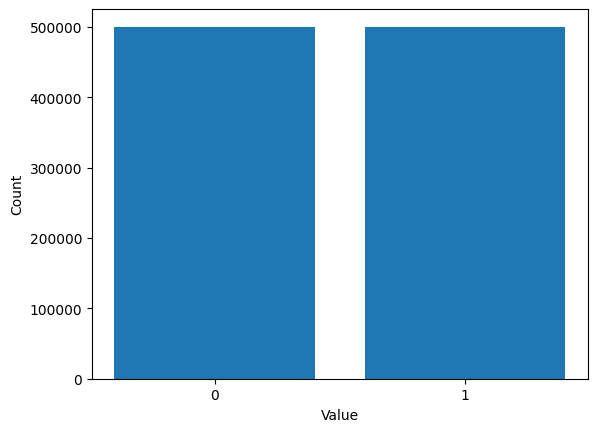

In [20]:
plt.figure(figsize=(10, 6))

# 画散点图，排除最后一列
for col in data.columns[:-1]:
    plt.scatter([col] * len(data), data[col], label=col)

plt.legend()
plt.title("Scatter Plot of Signals")
plt.show()

# 获取最后一列的数据
last_col = data.columns[-1]
values_count = data[last_col].value_counts()

# 画最后一列的条形图
plt.bar(values_count.index.astype(str), values_count.values)
plt.xlabel('Value')
plt.ylabel('Count')
plt.show()




### <font color='red'>Base on the scatter plot, we can see that most data is clustered in 0-200 range, and only few data is above 400, in case to increase the model accuracy we decide to mark those "high" value as outliers and remove them in data preprocessing step</font>
### <font color='red'> From the histogram we can see that target value(0 and 1) are about same amount, so, data remapping is not needed in this dataset</font>

## Use isolation forest to remove outliers

In [10]:
X = data.iloc[:, :-1].values
y = data.iloc[:, -1].values
original_length = len(X)

IF = IsolationForest(contamination=0.05)
outliers = IF.fit_predict(X)
X = X[outliers != -1]
y = y[outliers != -1]

new_length = len(X)

removed_data_count = original_length - new_length

print(f"{removed_data_count} data has been removed")




50000 data has been removed


## <font color='red'>在ppt中加上我们设定有百分之5的outlier</font>
<code>IF = IsolationForest(contamination=0.05)</code>

## Use a DNN model plus k-fold validation(k = 10) to train model

Epoch 1/10
21375/21375 [==============================] - 89s 4ms/step - loss: 0.1042 - accuracy: 0.9604 - val_loss: 0.0786 - val_accuracy: 0.9713
Epoch 2/10
21375/21375 [==============================] - 85s 4ms/step - loss: 0.0841 - accuracy: 0.9691 - val_loss: 0.0782 - val_accuracy: 0.9719
Epoch 3/10
21375/21375 [==============================] - 87s 4ms/step - loss: 0.0812 - accuracy: 0.9702 - val_loss: 0.0775 - val_accuracy: 0.9720
Epoch 4/10
21375/21375 [==============================] - 75s 3ms/step - loss: 0.0798 - accuracy: 0.9705 - val_loss: 0.0759 - val_accuracy: 0.9726
Epoch 5/10
21375/21375 [==============================] - 71s 3ms/step - loss: 0.0785 - accuracy: 0.9713 - val_loss: 0.0766 - val_accuracy: 0.9721
Epoch 6/10
21375/21375 [==============================] - 71s 3ms/step - loss: 0.0779 - accuracy: 0.9714 - val_loss: 0.0761 - val_accuracy: 0.9731
Epoch 7/10
21375/21375 [==============================] - 71s 3ms/step - loss: 0.0778 - accuracy: 0.9715 - val_loss: 0

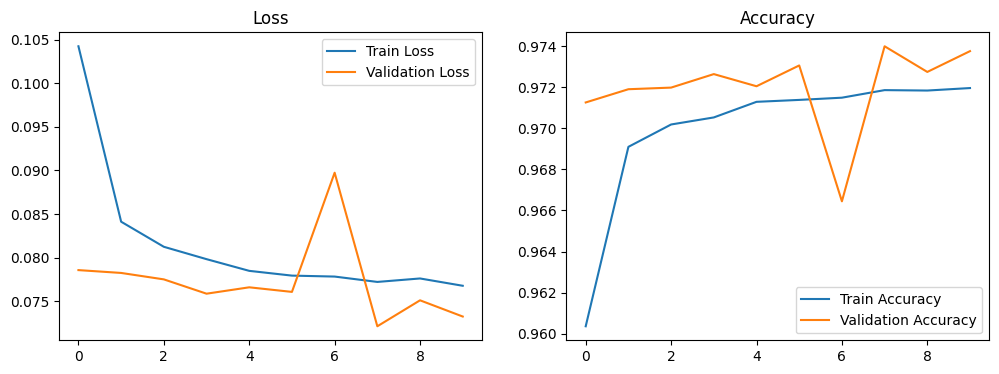

2375/2375 [==============================] - 2s 1ms/step
Epoch 1/10
21375/21375 [==============================] - 70s 3ms/step - loss: 0.1022 - accuracy: 0.9621 - val_loss: 0.0991 - val_accuracy: 0.9629
Epoch 2/10
21375/21375 [==============================] - 70s 3ms/step - loss: 0.0834 - accuracy: 0.9696 - val_loss: 0.0805 - val_accuracy: 0.9701
Epoch 3/10
21375/21375 [==============================] - 70s 3ms/step - loss: 0.0810 - accuracy: 0.9705 - val_loss: 0.0774 - val_accuracy: 0.9717
Epoch 4/10
21375/21375 [==============================] - 70s 3ms/step - loss: 0.0797 - accuracy: 0.9709 - val_loss: 0.0771 - val_accuracy: 0.9716
Epoch 5/10
21375/21375 [==============================] - 70s 3ms/step - loss: 0.0787 - accuracy: 0.9712 - val_loss: 0.0782 - val_accuracy: 0.9716
Epoch 6/10
21375/21375 [==============================] - 70s 3ms/step - loss: 0.0781 - accuracy: 0.9716 - val_loss: 0.0784 - val_accuracy: 0.9708
Epoch 7/10
21375/21375 [==============================] - 70s

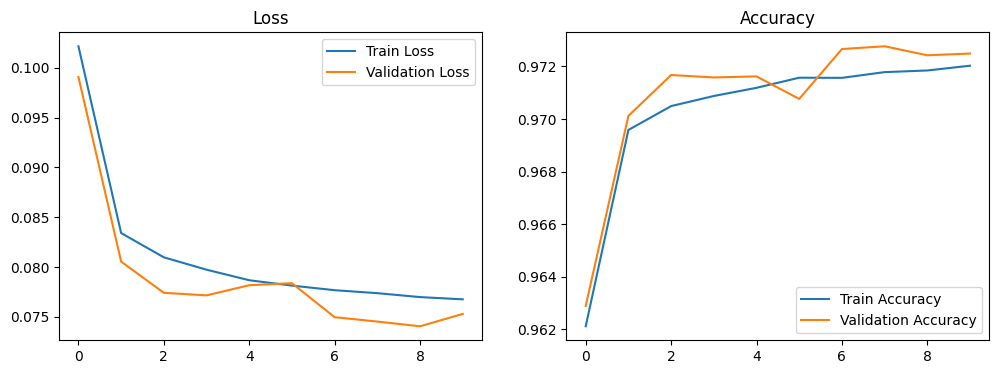

2375/2375 [==============================] - 2s 967us/step
Epoch 1/10
21375/21375 [==============================] - 70s 3ms/step - loss: 0.1023 - accuracy: 0.9621 - val_loss: 0.0862 - val_accuracy: 0.9683
Epoch 2/10
21375/21375 [==============================] - 71s 3ms/step - loss: 0.0842 - accuracy: 0.9692 - val_loss: 0.0801 - val_accuracy: 0.9706
Epoch 3/10
21375/21375 [==============================] - 71s 3ms/step - loss: 0.0810 - accuracy: 0.9704 - val_loss: 0.0788 - val_accuracy: 0.9712
Epoch 4/10
21375/21375 [==============================] - 70s 3ms/step - loss: 0.0793 - accuracy: 0.9709 - val_loss: 0.0800 - val_accuracy: 0.9707
Epoch 5/10
21375/21375 [==============================] - 70s 3ms/step - loss: 0.0784 - accuracy: 0.9711 - val_loss: 0.0843 - val_accuracy: 0.9685
Epoch 6/10
21375/21375 [==============================] - 70s 3ms/step - loss: 0.0779 - accuracy: 0.9715 - val_loss: 0.0852 - val_accuracy: 0.9676
Epoch 7/10
21375/21375 [==============================] - 7

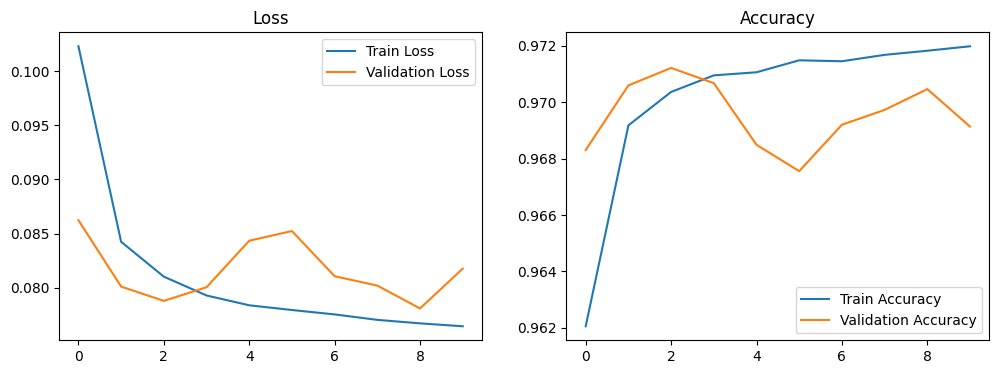

2375/2375 [==============================] - 2s 1ms/step
Epoch 1/10
21375/21375 [==============================] - 70s 3ms/step - loss: 0.1040 - accuracy: 0.9614 - val_loss: 0.0798 - val_accuracy: 0.9707
Epoch 2/10
21375/21375 [==============================] - 70s 3ms/step - loss: 0.0857 - accuracy: 0.9687 - val_loss: 0.0836 - val_accuracy: 0.9684
Epoch 3/10
21375/21375 [==============================] - 71s 3ms/step - loss: 0.0833 - accuracy: 0.9693 - val_loss: 0.0762 - val_accuracy: 0.9714
Epoch 4/10
21375/21375 [==============================] - 71s 3ms/step - loss: 0.0817 - accuracy: 0.9699 - val_loss: 0.0752 - val_accuracy: 0.9717
Epoch 5/10
21375/21375 [==============================] - 71s 3ms/step - loss: 0.0807 - accuracy: 0.9701 - val_loss: 0.0777 - val_accuracy: 0.9709
Epoch 6/10
21375/21375 [==============================] - 71s 3ms/step - loss: 0.0804 - accuracy: 0.9705 - val_loss: 0.0786 - val_accuracy: 0.9706
Epoch 7/10
21375/21375 [==============================] - 71s

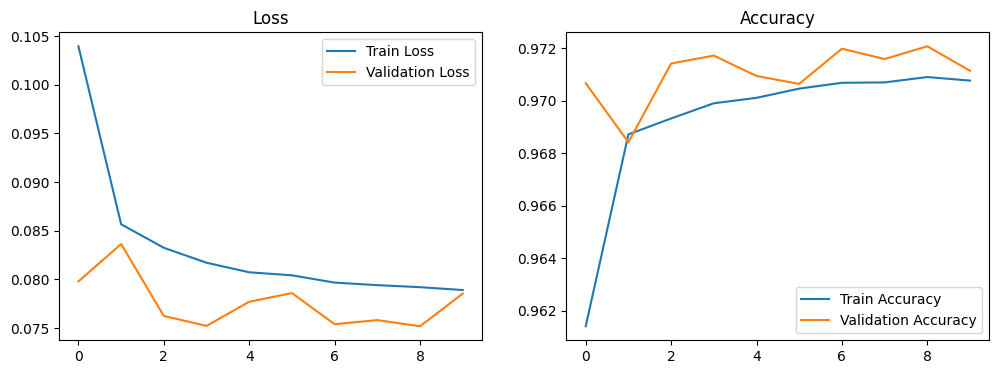

2375/2375 [==============================] - 2s 1ms/step
Epoch 1/10
21375/21375 [==============================] - 71s 3ms/step - loss: 0.1026 - accuracy: 0.9616 - val_loss: 0.0842 - val_accuracy: 0.9683
Epoch 2/10
21375/21375 [==============================] - 71s 3ms/step - loss: 0.0832 - accuracy: 0.9696 - val_loss: 0.0807 - val_accuracy: 0.9702
Epoch 3/10
21375/21375 [==============================] - 70s 3ms/step - loss: 0.0801 - accuracy: 0.9707 - val_loss: 0.0824 - val_accuracy: 0.9693
Epoch 4/10
21375/21375 [==============================] - 71s 3ms/step - loss: 0.0788 - accuracy: 0.9712 - val_loss: 0.0808 - val_accuracy: 0.9704
Epoch 5/10
21375/21375 [==============================] - 71s 3ms/step - loss: 0.0780 - accuracy: 0.9716 - val_loss: 0.0803 - val_accuracy: 0.9698
Epoch 6/10
21375/21375 [==============================] - 71s 3ms/step - loss: 0.0772 - accuracy: 0.9719 - val_loss: 0.0781 - val_accuracy: 0.9711
Epoch 7/10
21375/21375 [==============================] - 71s

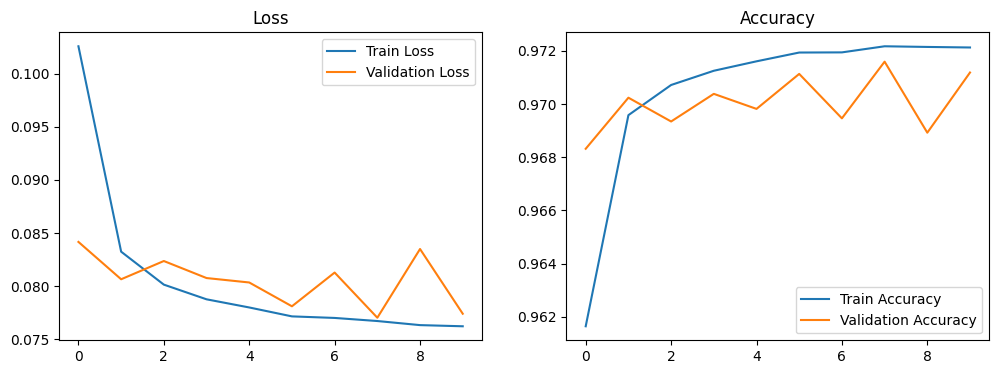

2375/2375 [==============================] - 2s 1ms/step
Epoch 1/10
21375/21375 [==============================] - 70s 3ms/step - loss: 0.1026 - accuracy: 0.9615 - val_loss: 0.0892 - val_accuracy: 0.9675
Epoch 2/10
21375/21375 [==============================] - 70s 3ms/step - loss: 0.0843 - accuracy: 0.9690 - val_loss: 0.0820 - val_accuracy: 0.9713
Epoch 3/10
21375/21375 [==============================] - 70s 3ms/step - loss: 0.0822 - accuracy: 0.9695 - val_loss: 0.0821 - val_accuracy: 0.9709
Epoch 4/10
21375/21375 [==============================] - 70s 3ms/step - loss: 0.0807 - accuracy: 0.9701 - val_loss: 0.0812 - val_accuracy: 0.9708
Epoch 5/10
21375/21375 [==============================] - 70s 3ms/step - loss: 0.0800 - accuracy: 0.9704 - val_loss: 0.0788 - val_accuracy: 0.9718
Epoch 6/10
21375/21375 [==============================] - 70s 3ms/step - loss: 0.0794 - accuracy: 0.9707 - val_loss: 0.0779 - val_accuracy: 0.9719
Epoch 7/10
21375/21375 [==============================] - 70s

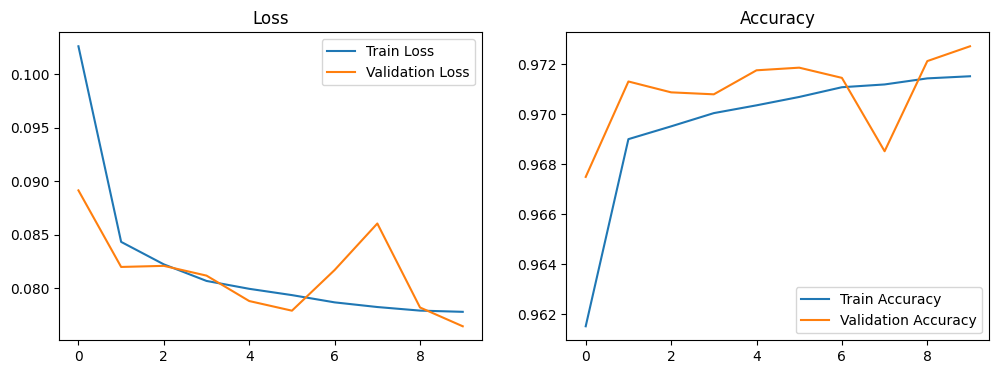

2375/2375 [==============================] - 2s 988us/step
Epoch 1/10
21375/21375 [==============================] - 70s 3ms/step - loss: 0.1032 - accuracy: 0.9614 - val_loss: 0.0855 - val_accuracy: 0.9700
Epoch 2/10
21375/21375 [==============================] - 70s 3ms/step - loss: 0.0843 - accuracy: 0.9688 - val_loss: 0.0801 - val_accuracy: 0.9701
Epoch 3/10
21375/21375 [==============================] - 70s 3ms/step - loss: 0.0812 - accuracy: 0.9701 - val_loss: 0.0804 - val_accuracy: 0.9701
Epoch 4/10
21375/21375 [==============================] - 70s 3ms/step - loss: 0.0802 - accuracy: 0.9705 - val_loss: 0.0767 - val_accuracy: 0.9718
Epoch 5/10
21375/21375 [==============================] - 70s 3ms/step - loss: 0.0793 - accuracy: 0.9709 - val_loss: 0.0807 - val_accuracy: 0.9702
Epoch 6/10
21375/21375 [==============================] - 70s 3ms/step - loss: 0.0787 - accuracy: 0.9709 - val_loss: 0.0770 - val_accuracy: 0.9718
Epoch 7/10
21375/21375 [==============================] - 7

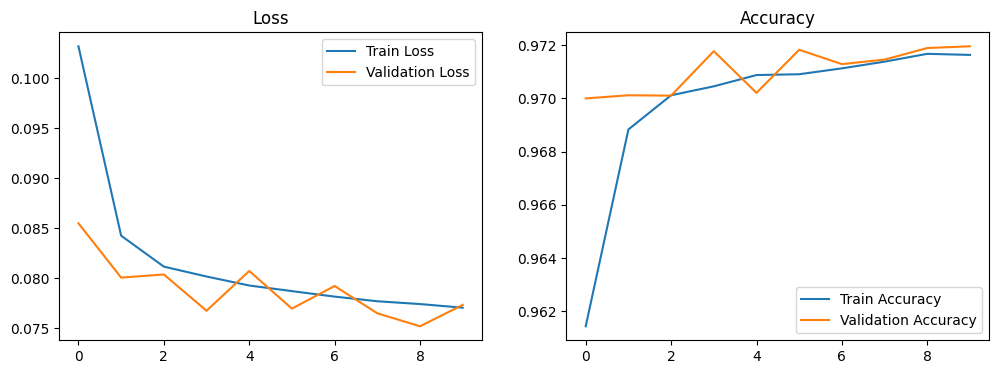

2375/2375 [==============================] - 2s 979us/step
Epoch 1/10
21375/21375 [==============================] - 70s 3ms/step - loss: 0.1033 - accuracy: 0.9612 - val_loss: 0.0829 - val_accuracy: 0.9696
Epoch 2/10
21375/21375 [==============================] - 70s 3ms/step - loss: 0.0834 - accuracy: 0.9694 - val_loss: 0.0797 - val_accuracy: 0.9709
Epoch 3/10
21375/21375 [==============================] - 70s 3ms/step - loss: 0.0805 - accuracy: 0.9706 - val_loss: 0.0842 - val_accuracy: 0.9686
Epoch 4/10
21375/21375 [==============================] - 70s 3ms/step - loss: 0.0789 - accuracy: 0.9713 - val_loss: 0.0759 - val_accuracy: 0.9726
Epoch 5/10
21375/21375 [==============================] - 70s 3ms/step - loss: 0.0784 - accuracy: 0.9715 - val_loss: 0.0774 - val_accuracy: 0.9714
Epoch 6/10
21375/21375 [==============================] - 70s 3ms/step - loss: 0.0775 - accuracy: 0.9718 - val_loss: 0.0764 - val_accuracy: 0.9715
Epoch 7/10
21375/21375 [==============================] - 7

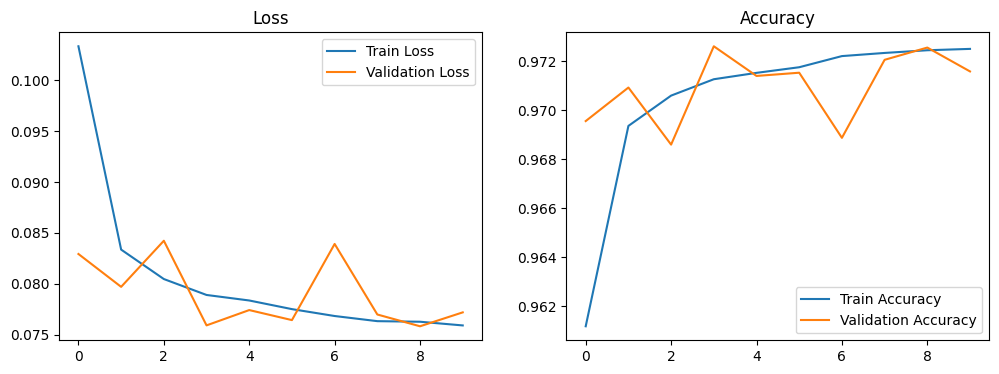

2375/2375 [==============================] - 2s 1ms/step
Epoch 1/10
21375/21375 [==============================] - 70s 3ms/step - loss: 0.1034 - accuracy: 0.9616 - val_loss: 0.0838 - val_accuracy: 0.9701
Epoch 2/10
21375/21375 [==============================] - 70s 3ms/step - loss: 0.0836 - accuracy: 0.9692 - val_loss: 0.0877 - val_accuracy: 0.9680
Epoch 3/10
21375/21375 [==============================] - 70s 3ms/step - loss: 0.0809 - accuracy: 0.9703 - val_loss: 0.0806 - val_accuracy: 0.9719
Epoch 4/10
21375/21375 [==============================] - 70s 3ms/step - loss: 0.0791 - accuracy: 0.9710 - val_loss: 0.0794 - val_accuracy: 0.9716
Epoch 5/10
21375/21375 [==============================] - 70s 3ms/step - loss: 0.0783 - accuracy: 0.9713 - val_loss: 0.0801 - val_accuracy: 0.9713
Epoch 6/10
21375/21375 [==============================] - 70s 3ms/step - loss: 0.0775 - accuracy: 0.9716 - val_loss: 0.0757 - val_accuracy: 0.9726
Epoch 7/10
21375/21375 [==============================] - 70s

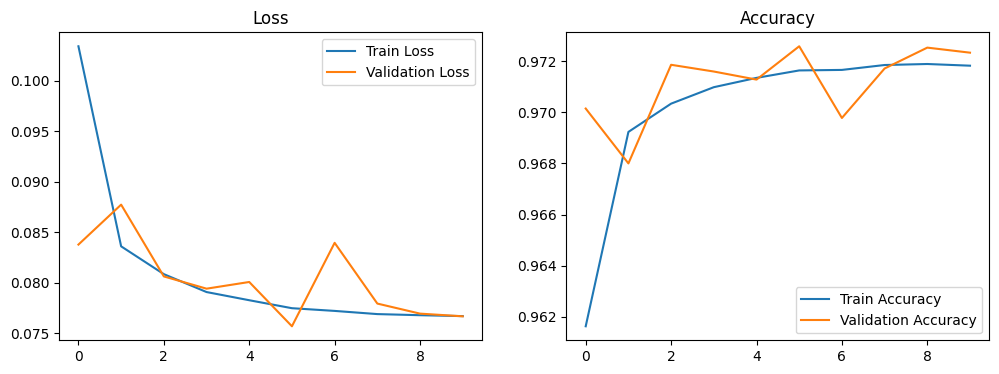

2375/2375 [==============================] - 2s 1ms/step
Epoch 1/10
21375/21375 [==============================] - 70s 3ms/step - loss: 0.1042 - accuracy: 0.9613 - val_loss: 0.0859 - val_accuracy: 0.9687
Epoch 2/10
21375/21375 [==============================] - 70s 3ms/step - loss: 0.0844 - accuracy: 0.9690 - val_loss: 0.0789 - val_accuracy: 0.9711
Epoch 3/10
21375/21375 [==============================] - 71s 3ms/step - loss: 0.0813 - accuracy: 0.9701 - val_loss: 0.0776 - val_accuracy: 0.9712
Epoch 4/10
21375/21375 [==============================] - 70s 3ms/step - loss: 0.0799 - accuracy: 0.9707 - val_loss: 0.0756 - val_accuracy: 0.9723
Epoch 5/10
21375/21375 [==============================] - 70s 3ms/step - loss: 0.0792 - accuracy: 0.9709 - val_loss: 0.0765 - val_accuracy: 0.9724
Epoch 6/10
21375/21375 [==============================] - 70s 3ms/step - loss: 0.0785 - accuracy: 0.9713 - val_loss: 0.0805 - val_accuracy: 0.9706
Epoch 7/10
21375/21375 [==============================] - 70s

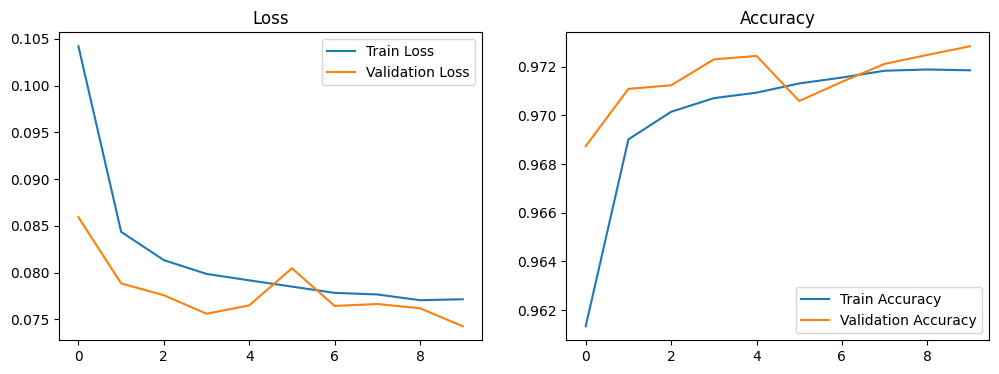

2375/2375 [==============================] - 2s 985us/step
Mean validation accuracy: 0.9719
Test accuracy: 0.9726
5938/5938 [==============================] - 6s 974us/step


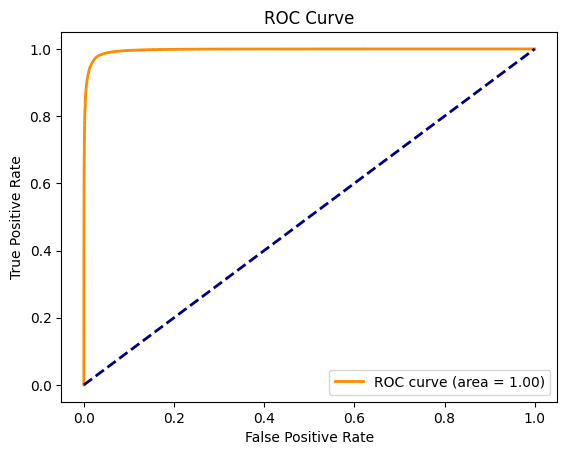

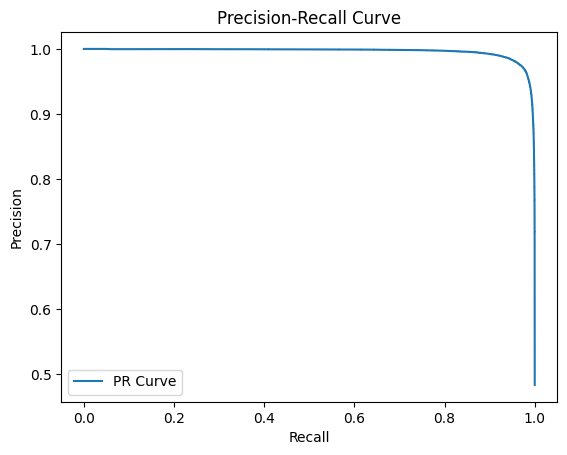

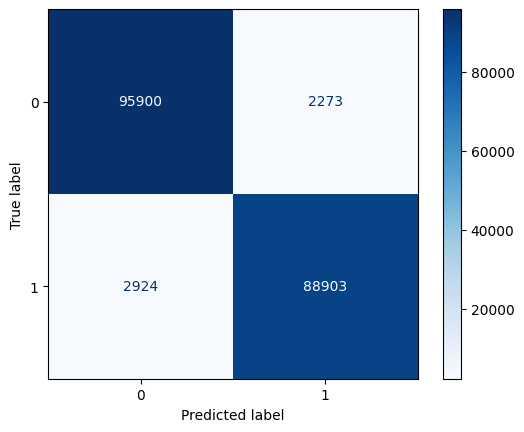

              precision    recall  f1-score   support

  background       0.97      0.98      0.97     98173
      signal       0.98      0.97      0.97     91827

    accuracy                           0.97    190000
   macro avg       0.97      0.97      0.97    190000
weighted avg       0.97      0.97      0.97    190000


In [5]:

from sklearn.model_selection import train_test_split, StratifiedKFold
from sklearn.metrics import roc_curve, auc, precision_recall_curve, confusion_matrix, ConfusionMatrixDisplay, classification_report
from tensorflow.keras import layers, Sequential
import matplotlib.pyplot as plt
import numpy as np
import tensorflow as tf

# 首先，将数据集分为训练集和测试集
X_train_full, X_test, y_train_full, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

# 创建k-fold
kf = StratifiedKFold(n_splits=10, shuffle=True, random_state=42)

accuracy = []

for train_index, val_index in kf.split(X_train_full, y_train_full):
    X_train, X_val = X_train_full[train_index], X_train_full[val_index]
    y_train, y_val = y_train_full[train_index], y_train_full[val_index]

    model = Sequential([
        layers.Dense(256, activation='relu', input_shape=(6,)),
        layers.Dense(128, activation='relu'),
        layers.Dense(64, activation='relu'),
        layers.Dense(1, activation='sigmoid')
    ])
    model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
    history = model.fit(X_train, y_train, epochs=10, batch_size=32, validation_data=(X_val, y_val), verbose=1)

    plt.figure(figsize=(12, 4))
    plt.subplot(1, 2, 1)
    plt.plot(history.history['loss'], label='Train Loss')
    plt.plot(history.history['val_loss'], label='Validation Loss')
    plt.legend()
    plt.title('Loss')
    plt.subplot(1, 2, 2)
    plt.plot(history.history['accuracy'], label='Train Accuracy')
    plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
    plt.legend()
    plt.title('Accuracy')
    plt.show()

    y_pred_val = model.predict(X_val)
    accuracy.append(history.history['val_accuracy'][-1])

print(f"Mean validation accuracy: {np.mean(accuracy):.4f}")

# 在测试集上评估模型的最终性能
test_loss, test_accuracy = model.evaluate(X_test, y_test, verbose=0)
print(f"Test accuracy: {test_accuracy:.4f}")

# 还可以进一步通过绘制ROC曲线、PR曲线和混淆矩阵等来评估模型的性能
y_pred_test = model.predict(X_test)

# 绘制ROC曲线
fpr, tpr, thresholds = roc_curve(y_test, y_pred_test)
roc_auc = auc(fpr, tpr)
plt.figure()
lw = 2
plt.plot(fpr, tpr, color='darkorange', lw=lw, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=lw, linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend(loc="lower right")
plt.show()

# 绘制PR曲线
precision, recall, _ = precision_recall_curve(y_test, y_pred_test)
plt.figure()
plt.plot(recall, precision, label='PR Curve')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall Curve')
plt.legend(loc="lower left")
plt.show()

# 绘制混淆矩阵
matrix = confusion_matrix(y_test, np.round(y_pred_test))
disp = ConfusionMatrixDisplay(confusion_matrix=matrix, display_labels=[0, 1])
disp.plot(cmap=plt.cm.Blues)
plt.show()

# 显示分类报告
y_pred_class = np.round(y_pred_test)
report = classification_report(y_test, y_pred_class, target_names=["background", "signal"])
print(report)


building tree 1 of 100building tree 2 of 100
building tree 3 of 100

building tree 4 of 100


[Parallel(n_jobs=4)]: Using backend ThreadingBackend with 4 concurrent workers.


building tree 5 of 100
building tree 6 of 100
building tree 7 of 100
building tree 8 of 100
building tree 9 of 100
building tree 10 of 100
building tree 11 of 100
building tree 12 of 100
building tree 13 of 100
building tree 14 of 100
building tree 15 of 100
building tree 16 of 100
building tree 17 of 100
building tree 18 of 100
building tree 19 of 100
building tree 20 of 100
building tree 21 of 100
building tree 22 of 100
building tree 23 of 100
building tree 24 of 100
building tree 25 of 100
building tree 26 of 100
building tree 27 of 100
building tree 28 of 100
building tree 29 of 100
building tree 30 of 100
building tree 31 of 100
building tree 32 of 100
building tree 33 of 100
building tree 34 of 100
building tree 35 of 100
building tree 36 of 100
building tree 37 of 100
building tree 38 of 100
building tree 39 of 100
building tree 40 of 100


[Parallel(n_jobs=4)]: Done  33 tasks      | elapsed:   15.8s


building tree 41 of 100
building tree 42 of 100
building tree 43 of 100
building tree 44 of 100
building tree 45 of 100
building tree 46 of 100
building tree 47 of 100
building tree 48 of 100
building tree 49 of 100
building tree 50 of 100
building tree 51 of 100
building tree 52 of 100
building tree 53 of 100
building tree 54 of 100
building tree 55 of 100
building tree 56 of 100
building tree 57 of 100
building tree 58 of 100
building tree 59 of 100
building tree 60 of 100
building tree 61 of 100
building tree 62 of 100
building tree 63 of 100
building tree 64 of 100
building tree 65 of 100
building tree 66 of 100
building tree 67 of 100
building tree 68 of 100
building tree 69 of 100
building tree 70 of 100
building tree 71 of 100
building tree 72 of 100
building tree 73 of 100
building tree 74 of 100
building tree 75 of 100
building tree 76 of 100
building tree 77 of 100
building tree 78 of 100
building tree 79 of 100
building tree 80 of 100
building tree 81 of 100
building tree 82

[Parallel(n_jobs=4)]: Done 100 out of 100 | elapsed:   44.1s finished
[Parallel(n_jobs=4)]: Using backend ThreadingBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done  33 tasks      | elapsed:    0.1s
[Parallel(n_jobs=4)]: Done 100 out of 100 | elapsed:    0.5s finished


准确率： 0.9744421052631579
分类报告：
               precision    recall  f1-score   support

           0       0.98      0.97      0.98     98183
           1       0.97      0.98      0.97     91817

    accuracy                           0.97    190000
   macro avg       0.97      0.97      0.97    190000
weighted avg       0.97      0.97      0.97    190000


[Parallel(n_jobs=4)]: Using backend ThreadingBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done  33 tasks      | elapsed:    0.1s
[Parallel(n_jobs=4)]: Done 100 out of 100 | elapsed:    0.5s finished
[Parallel(n_jobs=4)]: Using backend ThreadingBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done  33 tasks      | elapsed:    0.1s
[Parallel(n_jobs=4)]: Done 100 out of 100 | elapsed:    0.5s finished


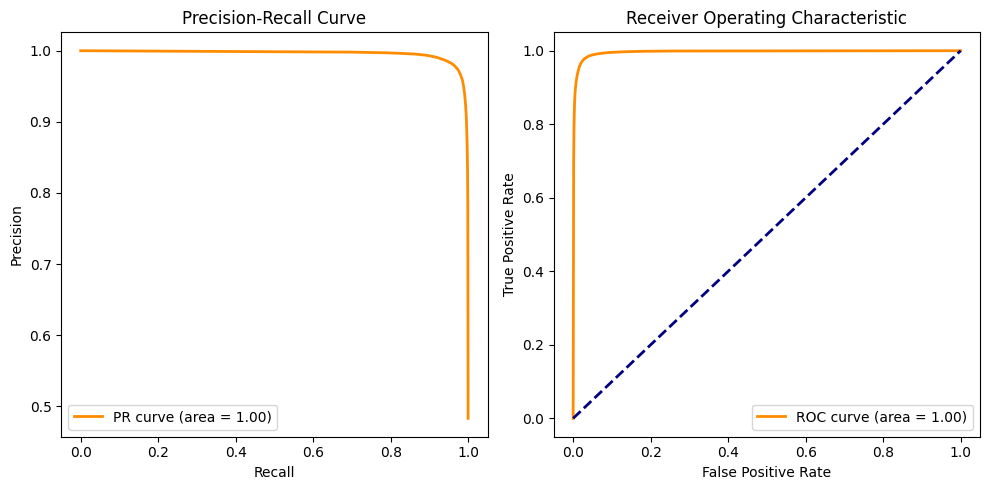

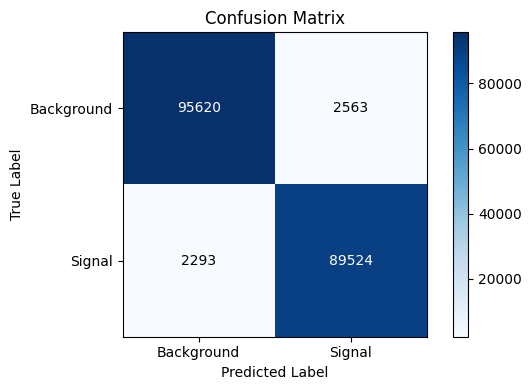

In [6]:

from sklearn.preprocessing import MinMaxScaler
# 读取文件
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.8, test_size=0.2)

# 随机森林模型
model = RandomForestClassifier(n_estimators=100, random_state=0, verbose=2, n_jobs=4)
model.fit(X_train, y_train)
preds = model.predict(X_test)

# 计算准确率
accuracy = accuracy_score(y_test, preds)
print("准确率：", accuracy)

# 打印分类报告，包括精确度、召回率、F1分数等
report = classification_report(y_test, preds)
print("分类报告：\n", report)

# 计算 Precision-Recall
precision, recall, _ = precision_recall_curve(y_test, model.predict_proba(X_test)[:, 1])
pr_auc = auc(recall, precision)

# 计算 ROC
fpr, tpr, _ = roc_curve(y_test, model.predict_proba(X_test)[:, 1])
roc_auc = auc(fpr, tpr)

# 画 PR 曲线
plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 1)
plt.plot(recall, precision, color='darkorange', lw=2, label='PR curve (area = {:.2f})'.format(pr_auc))
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall Curve')
plt.legend(loc='best')

# 画 ROC 曲线
plt.subplot(1, 2, 2)
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = {:.2f})'.format(roc_auc))
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic')
plt.legend(loc='best')

plt.tight_layout()
plt.show()

#计算混淆矩阵
conf_matrix = confusion_matrix(y_test, preds)

# 画混淆矩阵
plt.figure(figsize=(6, 4))
plt.imshow(conf_matrix, interpolation='nearest', cmap=plt.cm.Blues)
plt.title('Confusion Matrix')
plt.colorbar()
classes = ["Background", "Signal"]
tick_marks = np.arange(len(classes))
plt.xticks(tick_marks, classes)
plt.yticks(tick_marks, classes)
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
thresh = conf_matrix.max() / 2.
for i in range(conf_matrix.shape[0]):
    for j in range(conf_matrix.shape[1]):
        plt.text(j, i, format(conf_matrix[i, j], 'd'), ha="center", va="center", color="white" if conf_matrix[i, j] > thresh else "black")

plt.tight_layout()
plt.show()

## Logistic

准确率： 0.9147736842105263
分类报告：
               precision    recall  f1-score   support

           0       0.92      0.91      0.92     98650
           1       0.91      0.92      0.91     91350

    accuracy                           0.91    190000
   macro avg       0.91      0.91      0.91    190000
weighted avg       0.91      0.91      0.91    190000


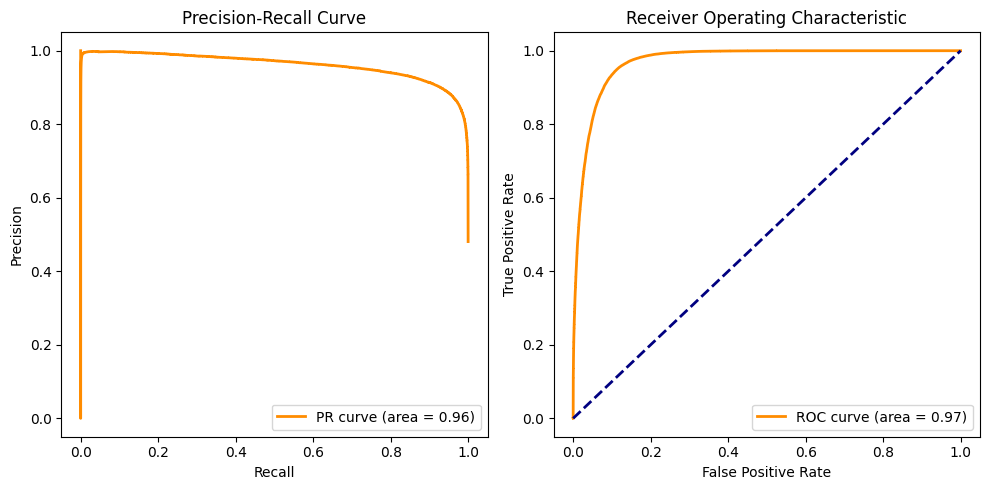

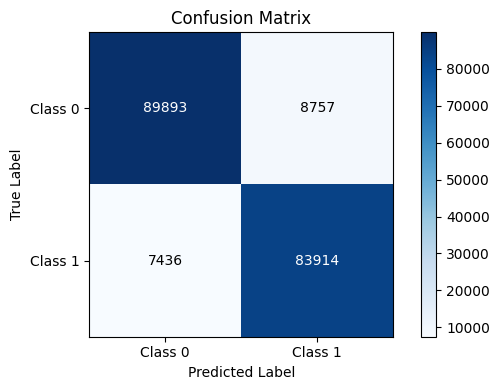

In [17]:
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.8, test_size=0.2)

# 逻辑回归模型
model = LogisticRegression()
model.fit(X_train, y_train)
preds = model.predict(X_test)

# 计算准确率
accuracy = accuracy_score(y_test, preds)
print("准确率：", accuracy)

# 打印分类报告，包括精确度、召回率、F1分数等
report = classification_report(y_test, preds)
print("分类报告：\n", report)

# 计算 Precision-Recall 和 ROC
precision, recall, _ = precision_recall_curve(y_test, model.predict_proba(X_test)[:, 1])
pr_auc = auc(recall, precision)
fpr, tpr, _ = roc_curve(y_test, model.predict_proba(X_test)[:, 1])
roc_auc = auc(fpr, tpr)

# 画 PR 曲线
plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 1)
plt.plot(recall, precision, color='darkorange', lw=2, label='PR curve (area = {:.2f})'.format(pr_auc))
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall Curve')
plt.legend(loc='best')

# 画 ROC 曲线
plt.subplot(1, 2, 2)
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = {:.2f})'.format(roc_auc))
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic')
plt.legend(loc='best')

plt.tight_layout()
plt.show()

# 计算混淆矩阵
conf_matrix = confusion_matrix(y_test, preds)

# 画混淆矩阵
plt.figure(figsize=(6, 4))
plt.imshow(conf_matrix, interpolation='nearest', cmap=plt.cm.Blues)
plt.title('Confusion Matrix')
plt.colorbar()
classes = ["Class 0", "Class 1"]
tick_marks = np.arange(len(classes))
plt.xticks(tick_marks, classes)
plt.yticks(tick_marks, classes)
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
thresh = conf_matrix.max() / 2.
for i in range(conf_matrix.shape[0]):
    for j in range(conf_matrix.shape[1]):
        plt.text(j, i, format(conf_matrix[i, j], 'd'), ha="center", va="center", color="white" if conf_matrix[i, j] > thresh else "black")

plt.tight_layout()
plt.show()

## Ridge

+++++++++++++++++++++++950000
准确率： 0.9112947368421053
分类报告：
               precision    recall  f1-score   support

           0       0.91      0.92      0.91     98430
           1       0.91      0.91      0.91     91570

    accuracy                           0.91    190000
   macro avg       0.91      0.91      0.91    190000
weighted avg       0.91      0.91      0.91    190000


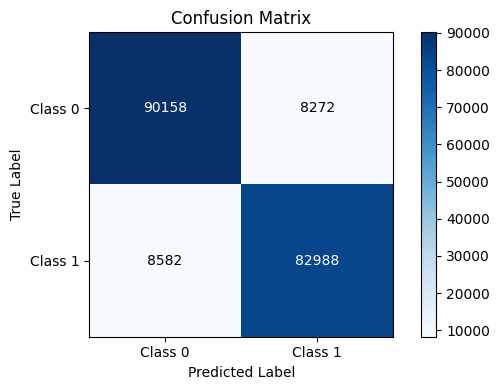

In [16]:
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.8, test_size=0.2)

# Ridge回归模型
model = RidgeClassifier()
model.fit(X_train, y_train)
preds = model.predict(X_test)

# 计算准确率
accuracy = accuracy_score(y_test, preds)
print("准确率：", accuracy)

# 打印分类报告，包括精确度、召回率、F1分数等
report = classification_report(y_test, preds)
print("分类报告：\n", report)

# 计算 Precision-Recall
# 注意：Ridge回归不提供predict_proba方法，因此我们不能直接计算PR曲线或ROC曲线
# 如果你需要这些曲线，你可能需要使用一个不同的模型

# 计算混淆矩阵
conf_matrix = confusion_matrix(y_test, preds)

# 画混淆矩阵
plt.figure(figsize=(6, 4))
plt.imshow(conf_matrix, interpolation='nearest', cmap=plt.cm.Blues)
plt.title('Confusion Matrix')
plt.colorbar()
classes = ["Class 0", "Class 1"]
tick_marks = np.arange(len(classes))
plt.xticks(tick_marks, classes)
plt.yticks(tick_marks, classes)
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
thresh = conf_matrix.max() / 2.
for i in range(conf_matrix.shape[0]):
    for j in range(conf_matrix.shape[1]):
        plt.text(j, i, format(conf_matrix[i, j], 'd'), ha="center", va="center", color="white" if conf_matrix[i, j] > thresh else "black")

plt.tight_layout()
plt.show()

## Lasso

准确率： 0.914921052631579
分类报告：
               precision    recall  f1-score   support

           0       0.92      0.91      0.92     98682
           1       0.90      0.92      0.91     91318

    accuracy                           0.91    190000
   macro avg       0.91      0.92      0.91    190000
weighted avg       0.92      0.91      0.91    190000


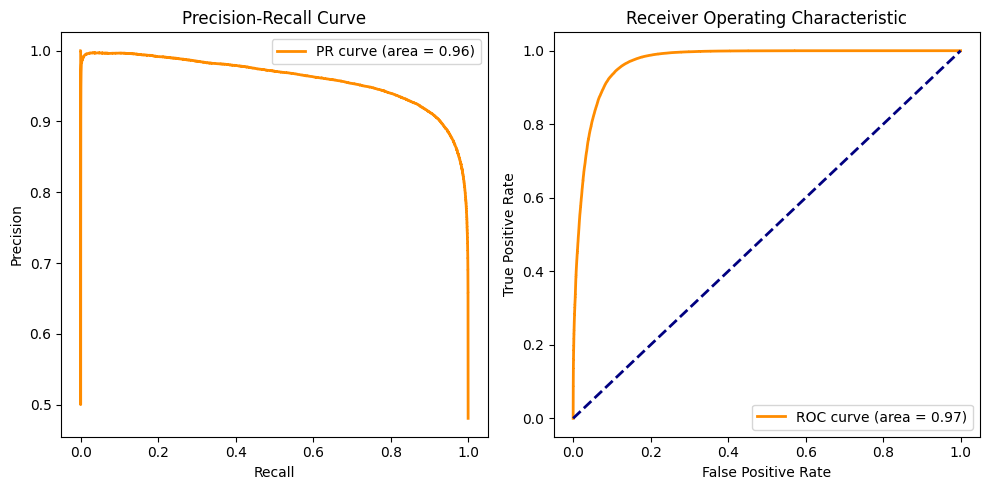

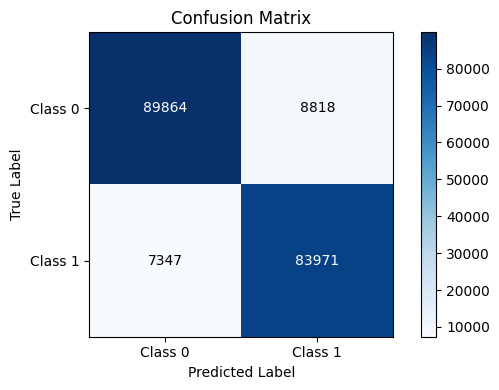

In [14]:
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.8, test_size=0.2)

# Lasso模型（通过在Logistic回归中使用L1惩罚实现）
model = LogisticRegression(penalty='l1', solver='liblinear')
model.fit(X_train, y_train)
preds = model.predict(X_test)

# 计算准确率
accuracy = accuracy_score(y_test, preds)
print("准确率：", accuracy)

# 打印分类报告，包括精确度、召回率、F1分数等
report = classification_report(y_test, preds)
print("分类报告：\n", report)

# 计算 Precision-Recall 和 ROC
precision, recall, _ = precision_recall_curve(y_test, model.predict_proba(X_test)[:, 1])
pr_auc = auc(recall, precision)
fpr, tpr, _ = roc_curve(y_test, model.predict_proba(X_test)[:, 1])
roc_auc = auc(fpr, tpr)

# 画 PR 曲线
plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 1)
plt.plot(recall, precision, color='darkorange', lw=2, label='PR curve (area = {:.2f})'.format(pr_auc))
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall Curve')
plt.legend(loc='best')

# 画 ROC 曲线
plt.subplot(1, 2, 2)
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = {:.2f})'.format(roc_auc))
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic')
plt.legend(loc='best')

plt.tight_layout()
plt.show()

# 计算混淆矩阵
conf_matrix = confusion_matrix(y_test, preds)

# 画混淆矩阵
plt.figure(figsize=(6, 4))
plt.imshow(conf_matrix, interpolation='nearest', cmap=plt.cm.Blues)
plt.title('Confusion Matrix')
plt.colorbar()
classes = ["Class 0", "Class 1"]
tick_marks = np.arange(len(classes))
plt.xticks(tick_marks, classes)
plt.yticks(tick_marks, classes)
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
thresh = conf_matrix.max() / 2.
for i in range(conf_matrix.shape[0]):
    for j in range(conf_matrix.shape[1]):
        plt.text(j, i, format(conf_matrix[i, j], 'd'), ha="center", va="center", color="white" if conf_matrix[i, j] > thresh else "black")

plt.tight_layout()
plt.show()